## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm

df1 = pd.read_excel('Data_Train.xlsx')
df1 = pd.read_excel('Data_Train.xlsx',na_values=[np.nan])
# Dropping New_Price due to irreglar Data
df1 = df1.drop(['New_Price'],axis=1)
df1 = df1.dropna()
df1 = df1[df1['Engine'] != float]
df1 = df1[df1['Power'] != float]
Power = []
Engine = []
Mileage = []
for ind in df1.index:
    s = df1['Engine'][ind]
    p = df1['Power'][ind]
    m = df1['Mileage'][ind]
    if(m == '0.0 kmpl'):
        df1 = df1.drop(ind)
        continue
    if(type(s)!=float and type(p)!=float and type(m)!=float):
        s = s.rsplit(' CC',1)[0] 
        p = p.rsplit(' bhp',1)[0] 
        m = m.rsplit(' k',1)[0] 
    if(s == 'null'or p =='null' or m =='null'):
        df1 = df1.drop(ind)
        continue
    s = float(s)
    p = float(p)
    m = float(m)
    Engine.append(s)
    Power.append(p)
    Mileage.append(m)
df1 = df1.drop(['Engine'],axis=1)
df1['Engine(CC)']=Engine
df1 = df1.drop(['Power'],axis=1)
df1['Power(BHP)'] = Power
df1 = df1.drop(['Mileage'],axis=1)
df1['Mileage'] = Mileage
df1 = df1.dropna()
df1 = df1[df1['Engine(CC)'] != float]
df1 = df1[df1['Price']<100]
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine(CC),Power(BHP),Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,998.0,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,1582.0,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,1199.0,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,1248.0,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968.0,140.80,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,1248.0,74.00,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,1120.0,71.00,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,2498.0,112.00,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,998.0,67.10,18.90


# Support Vector RegressorAnalysis
## x = Year y = Used Price

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


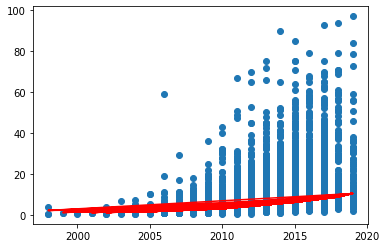

R2 value is: -0.050080901323610545


In [5]:
df2 = df1[['Year','Price']]
df2 = df2[df2['Price']<100]
X = df2['Year'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
linear_regressor = svm.SVR()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [9]:
x_test = float(input("Enter a Year: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0],2),"Lakh Rupees")

Enter a Year: 2010
Predicted Price is: 3.0 Lakh Rupees


## x = Kilometers_Driven y = used Price

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


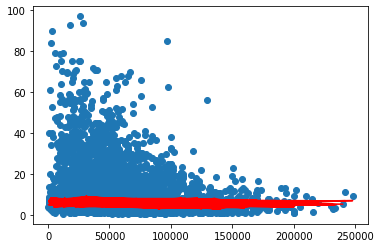

R2 value is: -0.057201338218147546


In [10]:
df2 = df1[['Kilometers_Driven','Price']]
df2 = df2[df2['Kilometers_Driven']<250000]
df2 = df2[df2['Price']<100]
X = df2['Kilometers_Driven'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
linear_regressor = svm.SVR()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [11]:
x_test = float(input("Enter kilometers driven: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0],2),"Lakh Rupees")

Enter kilometers driven: 25000
Predicted Price is: 6.85 Lakh Rupees


## x = Engine_size, y=price

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


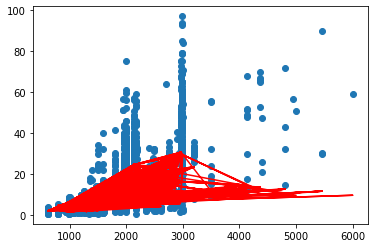

R2 value is: 0.5195006185154436


In [12]:
df2 = df1[['Engine(CC)','Price']]
X = df2['Engine(CC)'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
linear_regressor = svm.SVR()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [14]:
x_test = float(input("Enter Engine Size in CC: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0],2),"Lakh Rupees")

Enter Engine Size in CC: 1500
Predicted Price is: 8.38 Lakh Rupees


## x = Power, y=Price

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


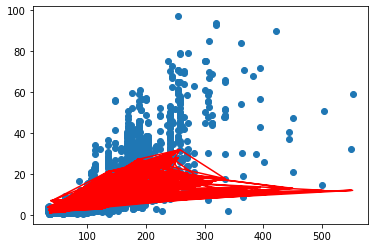

R2 value is: 0.5626687817483402


In [15]:
df2 = df1[['Power(BHP)','Price']]
df2 = df2[df2['Power(BHP)'] != float]
df2 = df2[df2['Price']<100]
X = df2['Power(BHP)'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
linear_regressor = svm.SVR()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [16]:
x_test = float(input("Enter Power in bhp: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0],2),"Lakh Rupees")

Enter Power in bhp: 250
Predicted Price is: 11.94 Lakh Rupees


df2 = df1[['Power','Price']]
df2 = df2.dropna()
df2 = df2[df2['Power'] != float]
Engine = [];
for ind in df2.index:
    s = df2['Power'][ind]
    
    if(type(s)!=float):
        s = s[:s.find(' ')]
    if(s == 'null'):
        df2 = df2.drop(ind)
        continue
    s = float(s)
    Engine.append(s)
df2['power']=Engine
df2.drop(['Power'],axis=1)
